In [114]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [12]:
df = pd.read_csv('youtubedatafinal.csv')

In [82]:
#Creating the dependent variable class
factor = pd.factorize(df['category_name'])
df.category_name = factor[0]
definitions = factor[1]
print(df.category_name.head())
print(definitions)

0    0
1    1
2    2
3    1
4    1
Name: category_name, dtype: int64
Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')


In [69]:
y.unique()

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43])

In [83]:
x = pd.read_csv('tokens.csv').drop('Unnamed: 0', axis=1)
y = df.category_name

In [16]:
unique_words = list(x.columns.values)

In [19]:
pca2 = PCA(n_components=2)
pca2.fit(x)
x2_pca = pca2.transform(x)
x2_pca = pd.DataFrame(x2_pca)

pca3 = PCA(n_components=3)
pca3.fit(x)
x3_pca = pca3.transform(x)
x3_pca = pd.DataFrame(x3_pca)

In [24]:
pca2.explained_variance_

array([0.00739593, 0.00479173])

In [25]:
pca3.explained_variance_

array([0.00739593, 0.00479173, 0.00296133])

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x)

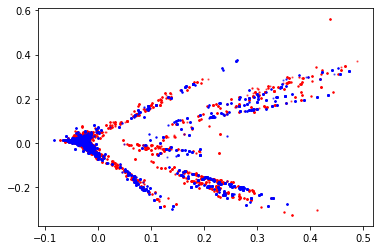

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x2_pca[0][:21000], x2_pca[1][:21000], s=1.5, alpha = 0.5, c = 'red')
plt.scatter(x2_pca[0][21001:], x2_pca[1][21001:], s=1.5, alpha = 0.5, c = 'blue')

In [26]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [29]:
results = pd.DataFrame()

In [94]:
def evaluate(test, pred, model):
    return [model, precision_score(test, pred, average = 'weighted'), recall_score(test, pred), accuracy_score(test, pred), f1_score(test, pred, average = 'weighted')]

In [30]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [86]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(x_test, y_test) 
print (accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(x_test)  


0.7609201027774379


In [72]:
cm = confusion_matrix(y_test, knn_predictions)

In [73]:
pd.crosstab(y_test, knn_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,1.0,2.0,10.0,15.0,17.0,19.0,20.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,43.0,All
True,,,,,,,,,,,,,,,,,
1,21,2,138,8,26,7,5,28,30,99,23,41,10,17,0,1,456
2,4,0,23,2,9,1,1,7,3,22,2,3,0,2,0,0,79
10,75,11,389,27,63,2,23,82,84,292,65,117,29,53,0,3,1315
15,6,0,59,2,7,1,2,9,13,32,12,13,3,8,0,1,168
17,22,2,125,8,29,1,6,22,27,87,22,36,8,22,0,0,417
19,3,0,18,1,7,0,1,6,5,13,6,8,2,4,0,0,74
20,7,1,48,2,10,2,4,9,10,28,7,16,5,7,0,0,156
22,36,4,195,9,32,4,10,36,49,134,32,65,18,23,0,0,647
23,42,8,216,4,30,3,9,48,56,154,35,53,15,27,0,1,701


In [42]:
len(df.category_id.unique())

16

In [74]:
from sklearn.metrics import f1_score

In [90]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 16):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds, average='weighted')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [96]:
find_best_k(x_train, y_train, x_test, y_test, min_k=1, max_k=25)

Best Value for k: 1
F1-Score: 0.8661481697939637


/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [76]:
start = time.time()
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(x_train, y_train)
knn_runtime = time.time() - start

In [ ]:
pd.crosstab(y_test, knn_pred, rownames=['True'], colnames=['Predicted'], margins=True)


In [95]:
a = evaluate(y_test, knn_pred, 'K Nearest Neighbors')

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

# Support Vector machine

In [ ]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(x_train, y_train) 
svm_predictions = svm_model_linear.predict(x_test, average = 'weighted') 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(x_test, y_test, average = 'weighted') 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 

## Random Forest

In [103]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
rfclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rfclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [105]:
# Predicting the Test set results
y_pred = rfclassifier.predict(x_test)
#Reverse factorize (converting y_pred from 0s,1s and 2s to Iris-setosa, Iris-versicolor and Iris-virginica
reversefactor = dict(zip(range(3),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']))


Predicted    0     1    2
Actual                   
0          519   140    1
1            2  1962    5
2            2   149  542


In [110]:
feature_importances = pd.DataFrame(rfclassifier.feature_importances_,
                                   index = x.columns,
                                columns=['importance']).sort_values('importance', ascending=False)

In [112]:
feature_importances.head(20)

,importance
official,0.039283
video,0.023850
trailer,0.018165
audio,0.016960
vs,0.013908
makeup,0.013676
ft,0.011332
new,0.011283
live,0.010352
cat,0.010180


## Naive Bayes Classifer


Naive Bayes classifier – Naive Bayes classification method is based on Bayes’ theorem. It is termed as ‘Naive’ because it assumes independence between every pair of feature in the data. Let (x1, x2, …, xn) be a feature vector and y be the class label corresponding to this feature vector.

In [ ]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(x_train, y_train) 
gnb_predictions = gnb.predict(x_test) 
  
# accuracy on X_test 
accuracy = gnb.score(x_test, y_test) 
print (accuracy) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions)